In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import curve_fit 
from scipy.stats import norm, lognorm

In [5]:
y_test_pred = np.load('DQR/y_test_pred_joint_300s.npy')
y_test_mean = np.load('DQR/y_test_mean_300s.npy')
y_test_std = np.load('DQR/y_test_std_300s.npy')
y_test = np.load('DQR/y_test_300s.npy')
y_pred_s = np.load('DQR/y_test_pred_joint_samples_300s.npy')

In [6]:
y_test_pred_ = y_test_pred#*np.repeat(y_test_std[..., np.newaxis, np.newaxis], 9, axis=4)+np.repeat(y_test_mean[..., np.newaxis, np.newaxis], 9, axis=4)

In [7]:
y_test_pred_.shape

(1309, 3, 39, 1, 11)

In [8]:
quantiles = np.sort([0.025, 0.975, 0.05, 0.95, 0.10, 0.90, 0.20, 0.8, 0.4, 0.6])

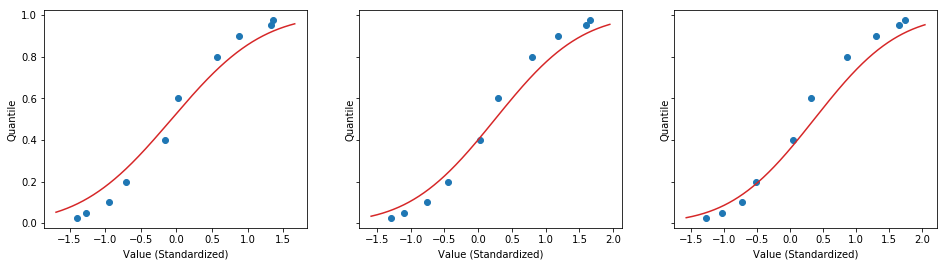

In [16]:
quantiles = np.sort(quantiles)
def norm_cdf(x, mu, sigma):
    return norm.cdf(x, mu, sigma)

def fit_plot_samples(ax, t, ln):
    mu = y_test_pred[t,0,ln,0,0]
    (sigma), _ = curve_fit(lambda x, sigma: norm_cdf(x, mu, sigma), y_test_pred[t,0,ln,0,1:], quantiles)
    x = np.linspace(y_test_pred[t,0,ln,0,1] - 0.3, y_test_pred[t,0,ln,0,10] + 0.3, 1000)
    ax.plot(y_test_pred[t,0,ln,0,1:], quantiles, color='C0', marker='o', linestyle='')
    ax.set_xlabel('Value (Standardized)')
    ax.set_ylabel('Quantile')
    ax.plot(x, norm.cdf(x, mu, sigma), color='C3')
    
fig, ax = plt.subplots(figsize=(16, 4), ncols=3, sharey=True)
fit_plot_samples(ax[0], t=200, ln=5)
fit_plot_samples(ax[1], t=200, ln=10)
fit_plot_samples(ax[2], t=200, ln=15)

plt.savefig('dqr-sampling.pdf', bbox_inches='tight')
plt.savefig('dqr-sampling.png', bbox_inches='tight', dpi=300)